In [28]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

In [29]:
def rle_decode(mask_rle, shape=(1280, 1918, 1)):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background
    '''
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)

    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths    
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
        
    img = img.reshape(shape)
    return img

In [30]:
df = pd.read_csv('data/dron.csv')
df.shape

(5, 2)

In [31]:
train_df = df[:4000]
val_df = df[4000:]

In [45]:
img_name, mask_rle = train_df.iloc[3]

img = cv2.imread('data/train_s/{}'.format(img_name))
mask = cv2.imread('data/train_s/{}'.format(mask_rle))


In [46]:
train_df = df[:4000]
val_df = df[4000:]

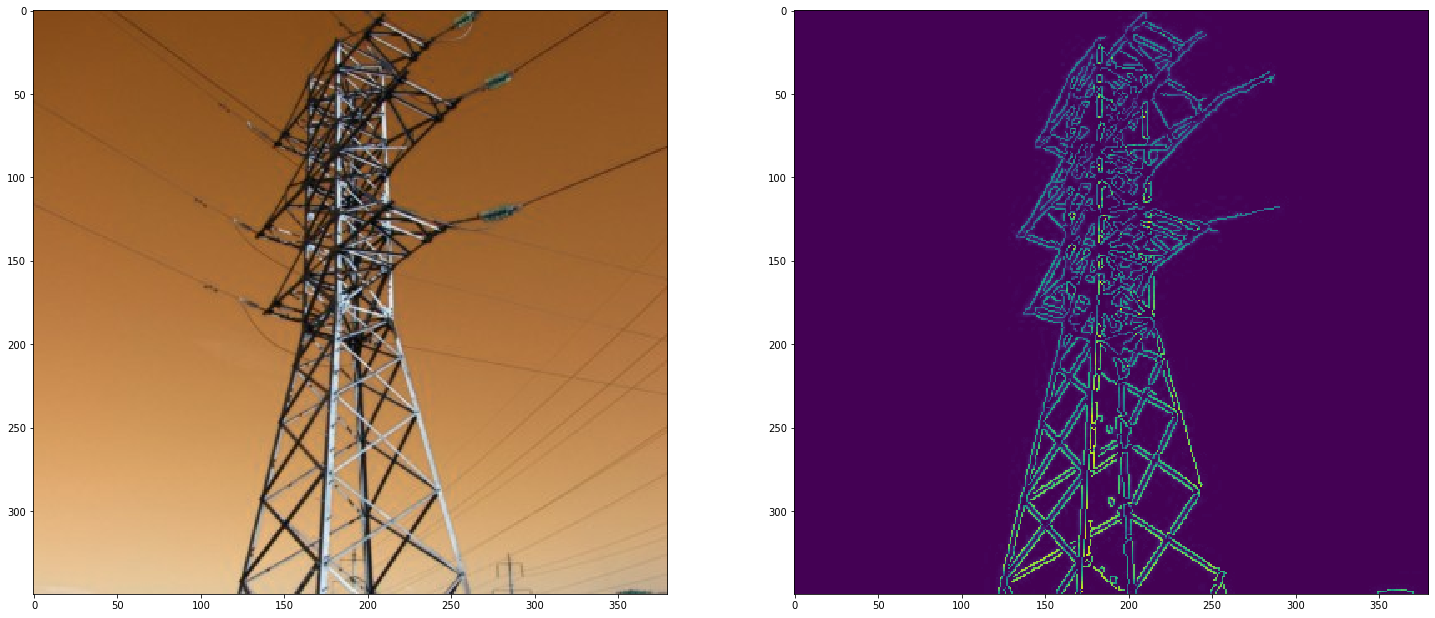

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 25))
axes[0].imshow(img)
axes[1].imshow(mask[..., 0])

plt.show()

In [13]:
def keras_generator(gen_df, batch_size):
    while True:
        x_batch = []
        y_batch = []
        
        for i in range(batch_size):
            img_name, mask_rle = gen_df.sample(1).values[0]
            img = cv2.imread('data/train_s/{}'.format(img_name))
            mask = cv2.imread('data/train_s/{}'.format(mask_rle))
            
            img = cv2.resize(img, (256, 256))
            mask = cv2.resize(mask, (256, 256))
            
            
            x_batch += [img]
            y_batch += [mask]

        x_batch = np.array(x_batch) / 255.
        y_batch = np.array(y_batch)

        yield x_batch, np.expand_dims(y_batch, -1)

In [39]:
for x, y in keras_generator(train_df, 16):
    break

In [40]:
x.shape

(16, 256, 256, 3)

In [41]:
y.shape

(16, 256, 256, 3, 1)

In [27]:
!pip install tensorflow

  ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


In [44]:
import keras
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, UpSampling2D, Conv2D, MaxPooling2D, Activation


Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'